In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

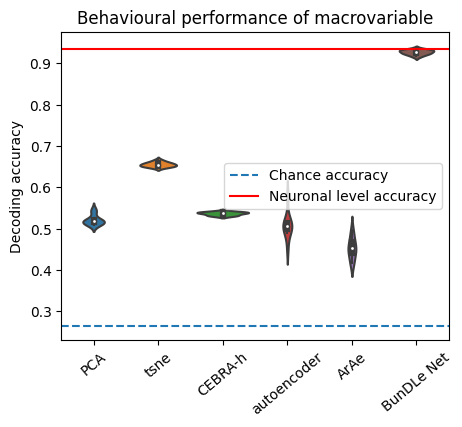

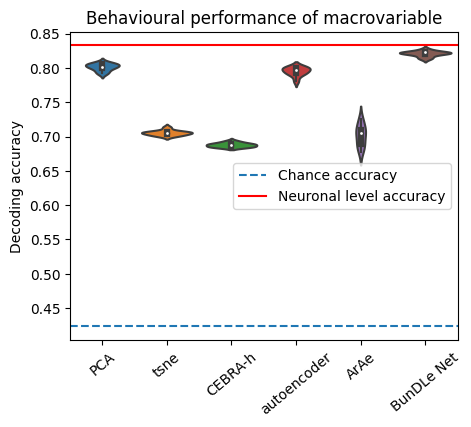

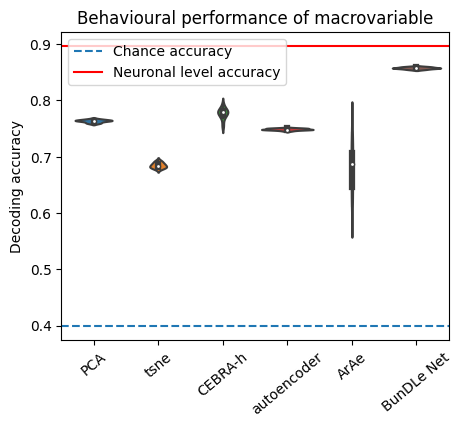

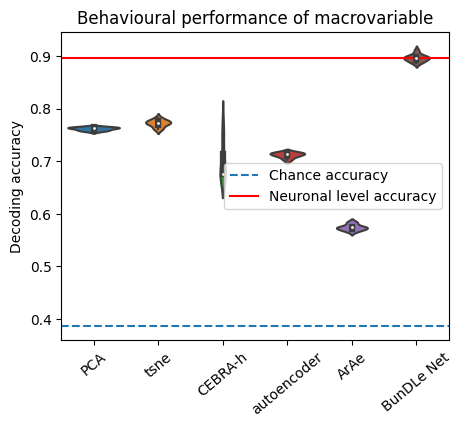

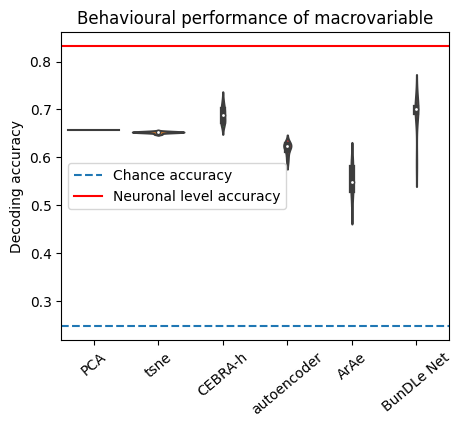

In [14]:
for worm_num in range(5):
    acc_array = []
    algorithms = ['PCA', 'tsne', 'cebra_h', 'autoencoder', 'ArAe', 'BunDLeNet']
    for alg in algorithms:
        acc_array.append( np.loadtxt('data/generated/evaluation_metrics/acc_list_' + alg + '_worm_' +  str(worm_num)) )
    acc_array = np.array(acc_array)
    ### Neuronal level accuracy (X)
    X_acc = np.loadtxt('data/generated/evaluation_metrics/acc_list_X_worm_'+str(worm_num)).max()
    chance_acc = np.loadtxt('data/generated/evaluation_metrics/acc_list_chance_worm_'+str(worm_num)).mean()



    plt.figure(figsize=(5,4))
    ax = sns.violinplot(data=acc_array.T[:,:7])
    ax.set_xticklabels(['PCA', 'tsne', 'CEBRA-h', 'autoencoder', 'ArAe', 'BunDLe Net'], rotation=40)
    ax.set(ylabel = "Decoding accuracy", title ='Behavioural performance of macrovariable')
    ax.axhline(chance_acc, linestyle='--',label='Chance accuracy') ### Chance accuracy (see Evaluation .ipynb)
    ax.axhline(X_acc, linestyle='-',label='Neuronal level accuracy', color='red') ### Chance accuracy (see Evaluation .ipynb)

    ax.legend()
    plt.savefig('behavioural_performance.pdf', transparent=True)

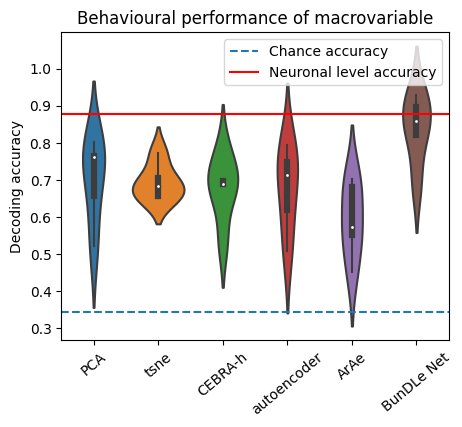

In [40]:
### POOLING WORMS
algorithms = ['PCA', 'tsne', 'cebra_h', 'autoencoder', 'ArAe', 'BunDLeNet']
acc_array = []
for alg in algorithms:
    worm_i_acc = []
    worm_chance_acc = []
    worm_X_acc = []
    for worm_num in range(5):
        acc = np.loadtxt('data/generated/evaluation_metrics/acc_list_' + alg + '_worm_' +  str(worm_num))
        X_acc = np.loadtxt('data/generated/evaluation_metrics/acc_list_X_worm_'+str(worm_num)).max()
        chance_acc = np.loadtxt('data/generated/evaluation_metrics/acc_list_chance_worm_'+str(worm_num)).mean()
        worm_i_acc.append(acc.mean())
        worm_chance_acc.append(chance_acc)
        worm_X_acc.append(X_acc)
        
    acc_array.append(worm_i_acc)

acc_array = np.array(acc_array)
worm_chance_acc = np.array(worm_chance_acc)
worm_X_acc = np.array(worm_X_acc)


plt.figure(figsize=(5,4))
ax = sns.violinplot(data=acc_array.T[:,:7])
ax.set_xticklabels(['PCA', 'tsne', 'CEBRA-h', 'autoencoder', 'ArAe', 'BunDLe Net'], rotation=40)
ax.set(ylabel = "Decoding accuracy", title ='Behavioural performance of macrovariable')
ax.axhline(worm_chance_acc.mean(), linestyle='--',label='Chance accuracy') ### Chance accuracy (see Evaluation .ipynb)
ax.axhline(worm_X_acc.mean(), linestyle='-',label='Neuronal level accuracy', color='red') ### Chance accuracy (see Evaluation .ipynb)

ax.legend()
plt.savefig('Figures/behavioural_performance.pdf', transparent=True)

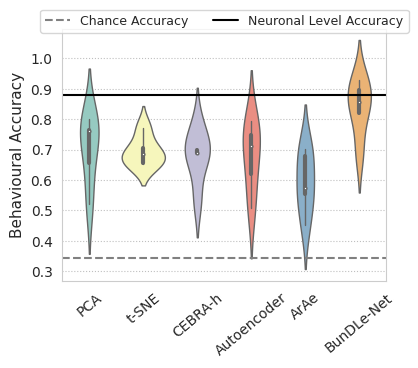

In [42]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 4))
ax = sns.violinplot(data=acc_array.T[:6], linewidth=1, palette=color_palette)
ax.set_xticklabels(['PCA', 't-SNE', 'CEBRA-h', 'Autoencoder', 'ArAe', 'BunDLe-Net'], rotation=40, fontsize=10)
ax.set_ylabel("Behavioural Accuracy", fontsize=11)
ax.axhline(worm_chance_acc.mean(), linestyle='--', label='Chance Accuracy', color='gray')
ax.axhline(worm_X_acc.mean(), linestyle='-', label='Neuronal Level Accuracy', color='black')
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.savefig('Figures/behavioural_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()

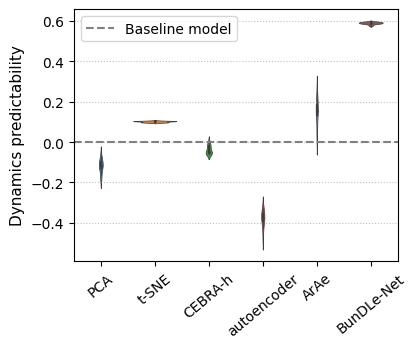

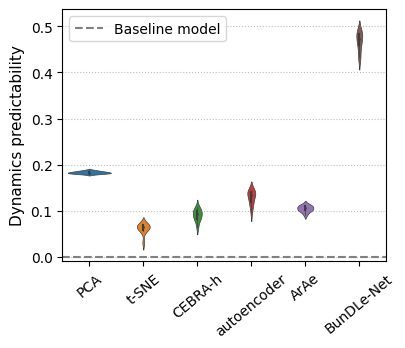

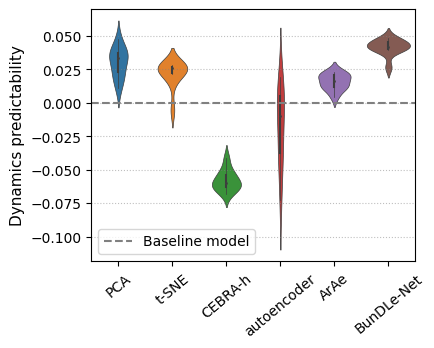

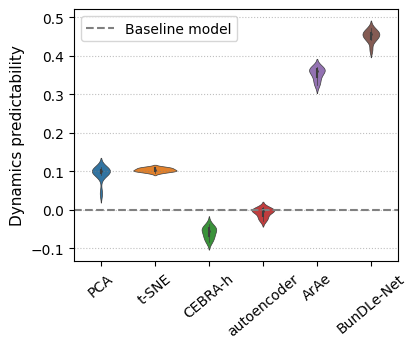

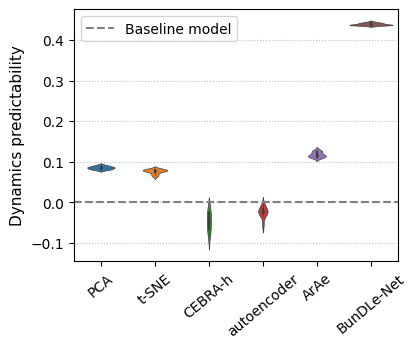

In [27]:
for worm_num in range(5):
    mse_array = []
    algorithms = ['PCA', 'tsne', 'cebra_h', 'autoencoder', 'ArAe', 'BunDLeNet']
    for alg in algorithms:
        filename = 'data/generated/evaluation_metrics/mse_list_' + alg + '_worm_' +  str(worm_num)
        mse_array.append(np.loadtxt(filename))
    mse_array = np.array(mse_array)
    goodness_of_fit = 1 -  mse_array[:,:,3]/mse_array[:,:,2]


    plt.figure(figsize=(4.5, 4))
    ax = sns.violinplot(data=goodness_of_fit.T, linewidth=.5)
    ax.set_xticklabels(['PCA', 't-SNE', 'CEBRA-h', 'autoencoder', 'ArAe', 'BunDLe-Net'], rotation=40, fontsize=10)
    ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
    ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
    plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
    # Adjust the bottom margin
    plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
    ax.legend()
    plt.savefig('Figures/dynamical_performance.pdf', transparent=True)

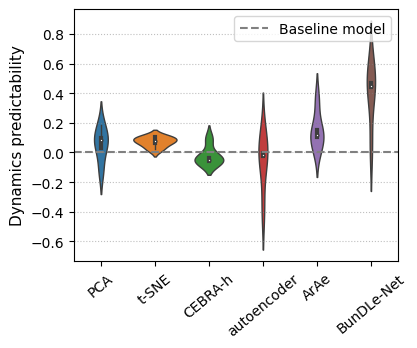

In [38]:
### POOLING WORMS
'''
algorithms = ['PCA', 'tsne', 'cebra_h', 'autoencoder', 'ArAe', 'BunDLeNet']
acc_array = []
for alg in algorithms:
    worm_i_acc = []
    '''
algorithms = ['PCA', 'tsne', 'cebra_h', 'autoencoder', 'ArAe', 'BunDLeNet']
dp_array = []
for alg in algorithms:
    worm_i_dp = []
    for worm_num in range(5):
        mse = np.loadtxt('data/generated/evaluation_metrics/mse_list_' + alg + '_worm_' +  str(worm_num))
        dyn_pred = 1 -  mse[:,3]/mse[:,2]
        worm_i_dp.append(dyn_pred.mean())

    dp_array.append(worm_i_dp)
    
dp_array = np.array(dp_array)


plt.figure(figsize=(4.5, 4))
ax = sns.violinplot(data=dp_array.T, linewidth=1)
ax.set_xticklabels(['PCA', 't-SNE', 'CEBRA-h', 'autoencoder', 'ArAe', 'BunDLe-Net'], rotation=40, fontsize=10)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
# Adjust the bottom margin
plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
ax.legend()
plt.savefig('Figures/dynamical_performance.pdf', transparent=True)

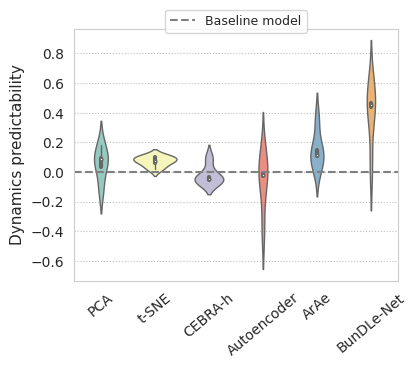

In [43]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 4))
ax = sns.violinplot(data=dp_array.T[:6], linewidth=1, palette=color_palette)
ax.set_xticklabels(['PCA', 't-SNE', 'CEBRA-h', 'Autoencoder', 'ArAe', 'BunDLe-Net'], rotation=40, fontsize=10)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)

ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.savefig('Figures/dynamical_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()